<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">KANs for Loan Approval Prediction
 (Classification)
</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Overview</font></h3>
    
* In this notebook I implement a Kolmogorov-Arnold Network (KAN) for Loan Approval Prediction and compare it against a neural network of a similar architecture.
* this dataset has more data than breast canser prediction and we want to assess KANs on larger datasets.
* The dataset is from Kaggle, available at this https://www.kaggle.com/competitions/playground-series-s4e10
    



# Import Packages


In [1]:
import torch
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

device = 'cpu'

## Loading the Dataset

In [2]:
digits = load_digits(n_class=5, as_frame=True)
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# from sklearn.datasets import fetch_openml
# digits = fetch_openml('mnist_784')

In [4]:
data = digits.data.join(pd.to_numeric(digits.target))
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  901 non-null    float64
 1   pixel_0_1  901 non-null    float64
 2   pixel_0_2  901 non-null    float64
 3   pixel_0_3  901 non-null    float64
 4   pixel_0_4  901 non-null    float64
 5   pixel_0_5  901 non-null    float64
 6   pixel_0_6  901 non-null    float64
 7   pixel_0_7  901 non-null    float64
 8   pixel_1_0  901 non-null    float64
 9   pixel_1_1  901 non-null    float64
 10  pixel_1_2  901 non-null    float64
 11  pixel_1_3  901 non-null    float64
 12  pixel_1_4  901 non-null    float64
 13  pixel_1_5  901 non-null    float64
 14  pixel_1_6  901 non-null    float64
 15  pixel_1_7  901 non-null    float64
 16  pixel_2_0  901 non-null    float64
 17  pixel_2_1  901 non-null    float64
 18  pixel_2_2  901 non-null    float64
 19  pixel_2_3  901 non-null    float64
 20  pixel_2_4 

<Axes: >

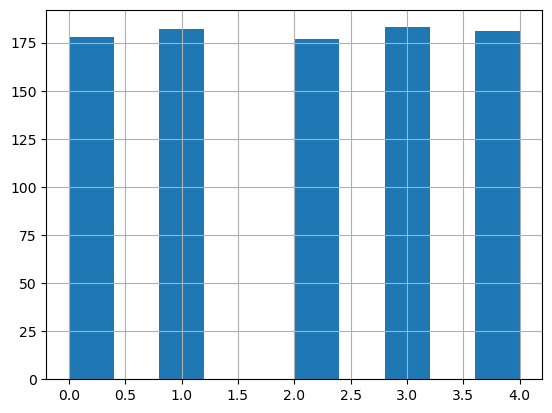

In [6]:
data.target.hist()

In [7]:
# Split dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

In [8]:
train_data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
347,0.0,0.0,4.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,13.0,10.0,0.0,0.0,0.0,0
785,0.0,0.0,2.0,15.0,14.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,14.0,9.0,0.0,0.0,0.0,1
592,0.0,1.0,8.0,10.0,14.0,10.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,12.0,16.0,14.0,12.0,4.0,0.0,3
582,0.0,1.0,9.0,15.0,16.0,6.0,0.0,0.0,0.0,13.0,...,0.0,0.0,0.0,10.0,16.0,16.0,14.0,5.0,0.0,3
599,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,16.0,5.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.0,0.0,0.0,0.0,9.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,16.0,3.0,0.0,1
767,0.0,0.0,2.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,16.0,7.0,0.0,0.0,0.0,4
72,0.0,0.0,13.0,14.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,13.0,14.0,12.0,12.0,0.0,0.0,2
235,0.0,0.0,3.0,16.0,9.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,3.0,10.0,16.0,14.0,3.0,0.0,0


## Preprocessing

In [97]:
def Preprocessing(data):
    #StandardScaler
    sacale = MinMaxScaler()
    target = data['target']
    data = sacale.fit_transform(data.drop(columns=['target']))
    return data, target.tolist()

In [98]:
def train_prepare(train_data, n):
    data = train_data.where(train_data.target==n)
    data = data.dropna()
    # data = pd.concat([data, train_data.iloc[0:10]], axis=0)
    return data    

In [99]:
def data_continual_learn(train_data, test_data, n):
    train_data = train_prepare(train_data, n)
    train_x, train_y = Preprocessing(train_data)
    test_x, test_y = Preprocessing(test_data)

    dataset = {}
    dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32, device=device)
    dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32, device=device)
    dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)
    dataset['test_label'] = torch.tensor(test_y, dtype=torch.long, device=device)

    return dataset

## Creating and Training the KAN

In [100]:
from kan import KAN

model = KAN(width=[64, 5], grid=5, k=3, seed=0, device=device)#, noise_scale=0.5, sp_trainable=False, sb_trainable=False, base_fun='zero')

checkpoint directory created: ./model
saving model version 0.0


In [101]:
dataset={}
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [102]:
%%time
N=10
all_result=[]
for i in range(5):
    dataset = data_continual_learn(train_data, test_data, i)
    results = model.fit(dataset, 
                        opt="LBFGS",
                        metrics=(train_acc, test_acc),
                        loss_fn=torch.nn.CrossEntropyLoss(),
                        steps=N, update_grid=False)
    all_result.extend(results['train_loss'])
    print('Training Accuracy :', results['train_acc'][-1])
    print('Test Accuracy :', results['test_acc'][-1])

description:   0%|                                                           | 0/10 [00:00<?, ?it/s]

| train_loss: 0.00e+00 | test_loss: 3.75e+00 | reg: 2.66e+01 | : 100%|█| 10/10 [00:01<00:00,  6.71it


saving model version 0.1
Training Accuracy : 1.0
Test Accuracy : 0.1767955869436264


| train_loss: 0.00e+00 | test_loss: 3.84e+00 | reg: 4.10e+01 | : 100%|█| 10/10 [00:00<00:00, 19.27it


saving model version 0.2
Training Accuracy : 1.0
Test Accuracy : 0.20441989600658417


| train_loss: 4.27e-05 | test_loss: 3.55e+00 | reg: 4.57e+01 | : 100%|█| 10/10 [00:00<00:00, 13.05it


saving model version 0.3
Training Accuracy : 1.0
Test Accuracy : 0.2541436553001404


| train_loss: 0.00e+00 | test_loss: 4.04e+00 | reg: 5.38e+01 | : 100%|█| 10/10 [00:00<00:00, 57.39it


saving model version 0.4
Training Accuracy : 1.0
Test Accuracy : 0.20441989600658417


| train_loss: 3.96e-05 | test_loss: 3.66e+00 | reg: 6.04e+01 | : 100%|█| 10/10 [00:00<00:00, 13.19it


saving model version 0.5
Training Accuracy : 1.0
Test Accuracy : 0.16022099554538727
CPU times: total: 547 ms
Wall time: 3.82 s


Text(0, 0.5, 'Loss')

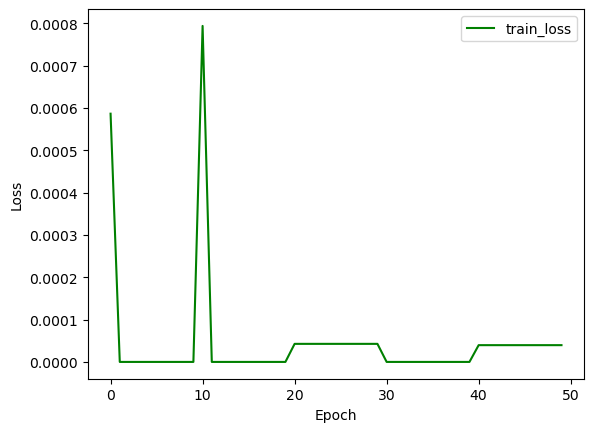

In [103]:
plt.plot(all_result, 'g', label='train_loss') 
#plt.plot(range(N),results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [105]:
print('Training Accuracy :', results['train_acc'][-1])
print('Test Accuracy :', results['test_acc'][-1])

Training Accuracy : 1.0
Test Accuracy : 0.16022099554538727


In [106]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total trainable parameters :', params)

Total trainable parameters : 4480


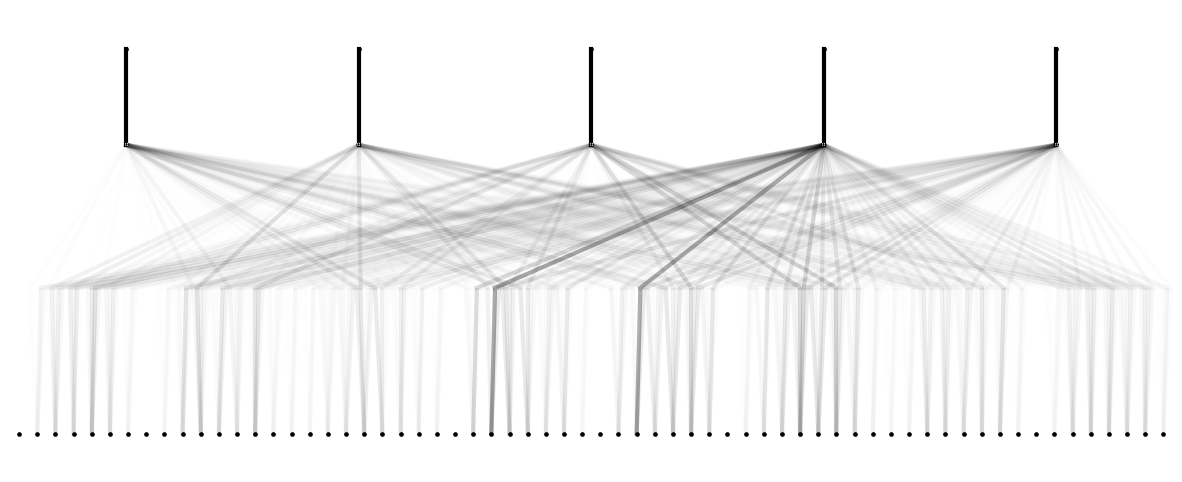

In [69]:
model.plot(scale=1.5)

# Implementation of a Neural Network for comparison

In [107]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(64, 64)  # 4 inputs to 5 hidden nodes
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(64, 5)  # 5 hidden nodes to 3 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=100):
    model.train()
    loss_list = []
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        loss_list.append(loss.item())
        # print(f'Epoch {epoch+1}, Loss: {loss.item()}')
    return loss_list

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')

In [108]:
def load_dataset(dataset):
    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['train_input'], dataset['train_label']), batch_size=1000, shuffle=False)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['test_input'], dataset['test_label']), batch_size=1000, shuffle=False)

    return train_loader, test_loader


## Train and Evaluate the NN

In [109]:
%%time
N=1000
model = NeuralNetwork().to(device)

CPU times: total: 0 ns
Wall time: 8.34 ms


In [110]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
all_loss=[]

for i in range(5):
    train_loader, test_loader = load_dataset(data_continual_learn(train_data, test_data, i))
    loss_list = train_model(model, train_loader, criterion, optimizer, num_epochs=N)
    all_loss.extend(loss_list)
    test_model(model, train_loader)
    test_model(model, test_loader)

Accuracy: 100.0%
Accuracy: 17.679558011049725%
Accuracy: 100.0%
Accuracy: 20.441988950276244%
Accuracy: 100.0%
Accuracy: 25.414364640883978%
Accuracy: 100.0%
Accuracy: 20.441988950276244%
Accuracy: 100.0%
Accuracy: 16.022099447513813%


Text(0, 0.5, 'Loss')

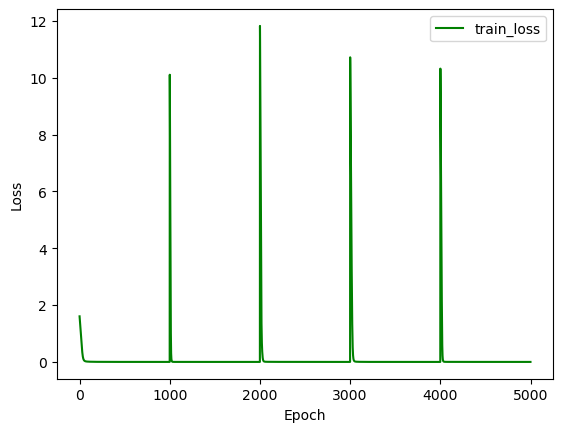

In [111]:
plt.plot(all_loss, 'g', label='train_loss') 
#plt.plot(range(N),results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [112]:
train_x, train_y = Preprocessing(train_data)
test_x, test_y = Preprocessing(test_data)
dataset = {}
dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32, device=device)
dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32, device=device)
dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)
dataset['test_label'] = torch.tensor(test_y, dtype=torch.long, device=device)
train_loader, test_loader = load_dataset(dataset)

In [113]:
test_model(model, test_loader)

Accuracy: 16.022099447513813%


In [114]:
test_model(model, train_loader)

Accuracy: 21.11111111111111%


In [115]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

4485

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: green; font-size:100%; text-align:left">

<h3 align="center"><font color='white'>💡 Summary from above :</font></h3>

1. Neural Network architecture is much better than KAN 
